# 正则化

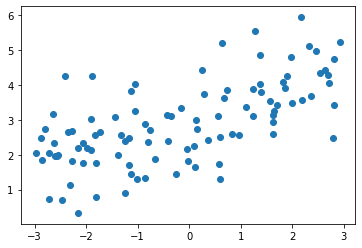

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 样本数据
np.random.seed(42)
x = np.random.uniform(-3., 3., size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3. + np.random.normal(0, 1, size = 100)

plt.scatter(x, y)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression(n_jobs=-1))
    ])

In [4]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(20)
poly_reg.fit(x_train, y_train)

y_predict = poly_reg.predict(x_test)
mean_squared_error(y_test, y_predict)

39.412209787646674

### 图形绘制

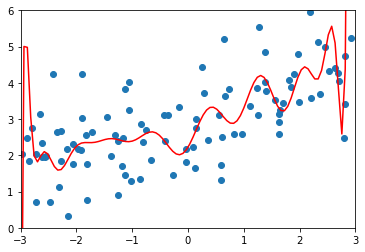

In [5]:
# 模型绘制函数
def plot_model(model):
    x_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(x_plot)

    plt.scatter(x, y)
    plt.plot(x_plot, y_plot, color = "r")
    plt.axis([-3, 3, 0, 6])
    plt.show()

    
plot_model(poly_reg)

## 使用岭回归

In [9]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge", Ridge(alpha=alpha))
    ])

In [18]:
# 岭回归实例化

def ridge_real(degree, alpha):
    ridge_1 = RidgeRegression(degree, alpha)
    ridge_1.fit(x_train, y_train)
    y_predict_ridge = ridge_1.predict(x_test)
    print("MSE : ", mean_squared_error(y_test, y_predict_ridge))
    plot_model(ridge_1)

MSE :  1.0893530409595888


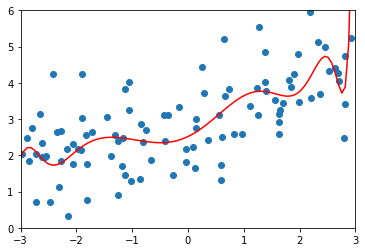

In [19]:
ridge_real(20, 0.0001)

MSE :  0.9828159428696063


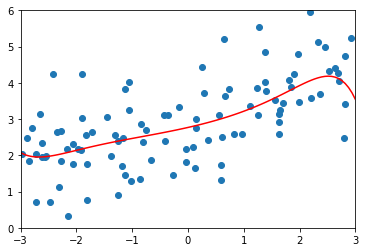

In [32]:
ridge_real(10, 5)